In [ ]:
"""
Object Detection model on images
-- Tensor Flow object detection models that have been trained on the COCO 2017 dataset, from TensorFlow Hub 
-- object detection with YOLO
--compare two models Mask R-CNN Inception and YOLO in object detection
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
#pip install ultralytics 
from ultralytics import YOLO

2024-09-05 12:57:06.846572: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
ALL_MODELS = {
'CenterNet HourGlass104 512x512' : 'https://tfhub.dev/tensorflow/centernet/hourglass_512x512/1',
'CenterNet HourGlass104 Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/hourglass_512x512_kpts/1',
'CenterNet HourGlass104 1024x1024' : 'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024/1',
'CenterNet HourGlass104 Keypoints 1024x1024' : 'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024_kpts/1',
'CenterNet Resnet50 V1 FPN 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512/1',
'CenterNet Resnet50 V1 FPN Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512_kpts/1',
'CenterNet Resnet101 V1 FPN 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet101v1_fpn_512x512/1',
'CenterNet Resnet50 V2 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512/1',
'CenterNet Resnet50 V2 Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512_kpts/1',
'EfficientDet D0 512x512' : 'https://tfhub.dev/tensorflow/efficientdet/d0/1',
'EfficientDet D1 640x640' : 'https://tfhub.dev/tensorflow/efficientdet/d1/1',
'EfficientDet D2 768x768' : 'https://tfhub.dev/tensorflow/efficientdet/d2/1',
'EfficientDet D3 896x896' : 'https://tfhub.dev/tensorflow/efficientdet/d3/1',
'EfficientDet D4 1024x1024' : 'https://tfhub.dev/tensorflow/efficientdet/d4/1',
'EfficientDet D5 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d5/1',
'EfficientDet D6 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d6/1',
'EfficientDet D7 1536x1536' : 'https://tfhub.dev/tensorflow/efficientdet/d7/1',
'SSD MobileNet v2 320x320' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2',
'SSD MobileNet V1 FPN 640x640' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v1/fpn_640x640/1',
'SSD MobileNet V2 FPNLite 320x320' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_320x320/1',
'SSD MobileNet V2 FPNLite 640x640' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_640x640/1',
'SSD ResNet50 V1 FPN 640x640 (RetinaNet50)' : 'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_640x640/1',
'SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)' : 'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_1024x1024/1',
'SSD ResNet101 V1 FPN 640x640 (RetinaNet101)' : 'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_640x640/1',
'SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)' : 'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_1024x1024/1',
'SSD ResNet152 V1 FPN 640x640 (RetinaNet152)' : 'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_640x640/1',
'SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)' : 'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_1024x1024/1',
'Faster R-CNN ResNet50 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1',
'Faster R-CNN ResNet50 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_1024x1024/1',
'Faster R-CNN ResNet50 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_800x1333/1',
'Faster R-CNN ResNet101 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_640x640/1',
'Faster R-CNN ResNet101 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_1024x1024/1',
'Faster R-CNN ResNet101 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_800x1333/1',
'Faster R-CNN ResNet152 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_640x640/1',
'Faster R-CNN ResNet152 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_1024x1024/1',
'Faster R-CNN ResNet152 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_800x1333/1',
'Faster R-CNN Inception ResNet V2 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1',
'Faster R-CNN Inception ResNet V2 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_1024x1024/1',
'Mask R-CNN Inception ResNet V2 1024x1024' : 'https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1'
}

In [17]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Kitano_Street_Kobe01s5s4110.jpg/2560px-Kitano_Street_Kobe01s5s4110.jpg"
img=keras.utils.get_file(origin=image_url,cache_dir='.')
image = cv2.imread(img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

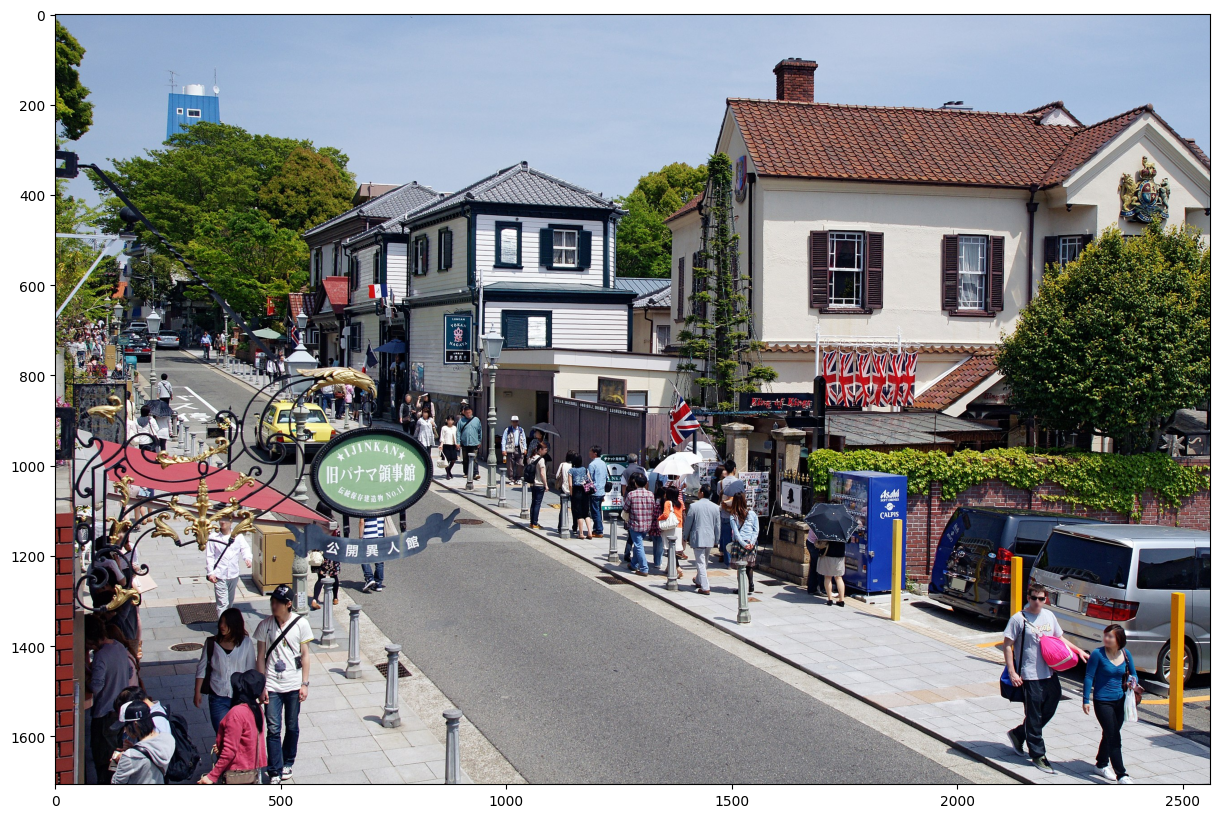

In [18]:
plt.figure(figsize=(15, 10))
plt.imshow(image)

In [4]:
model = hub.load("https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1")
input_image = tf.expand_dims(image, axis=0)
output = model(input_image)
result = {key:value.numpy() for key,value in output.items()}
print(result.keys())

dict_keys(['box_classifier_features', 'proposal_boxes', 'proposal_boxes_normalized', 'detection_classes', 'rpn_box_predictor_features', 'rpn_objectness_predictions_with_background', 'rpn_features_to_crop', 'class_predictions_with_background', 'anchors', 'image_shape', 'num_proposals', 'mask_predictions', 'raw_detection_boxes', 'detection_masks', 'detection_boxes', 'rpn_box_encodings', 'final_anchors', 'detection_multiclass_scores', 'refined_box_encodings', 'raw_detection_scores', 'num_detections', 'detection_anchor_indices', 'detection_scores'])


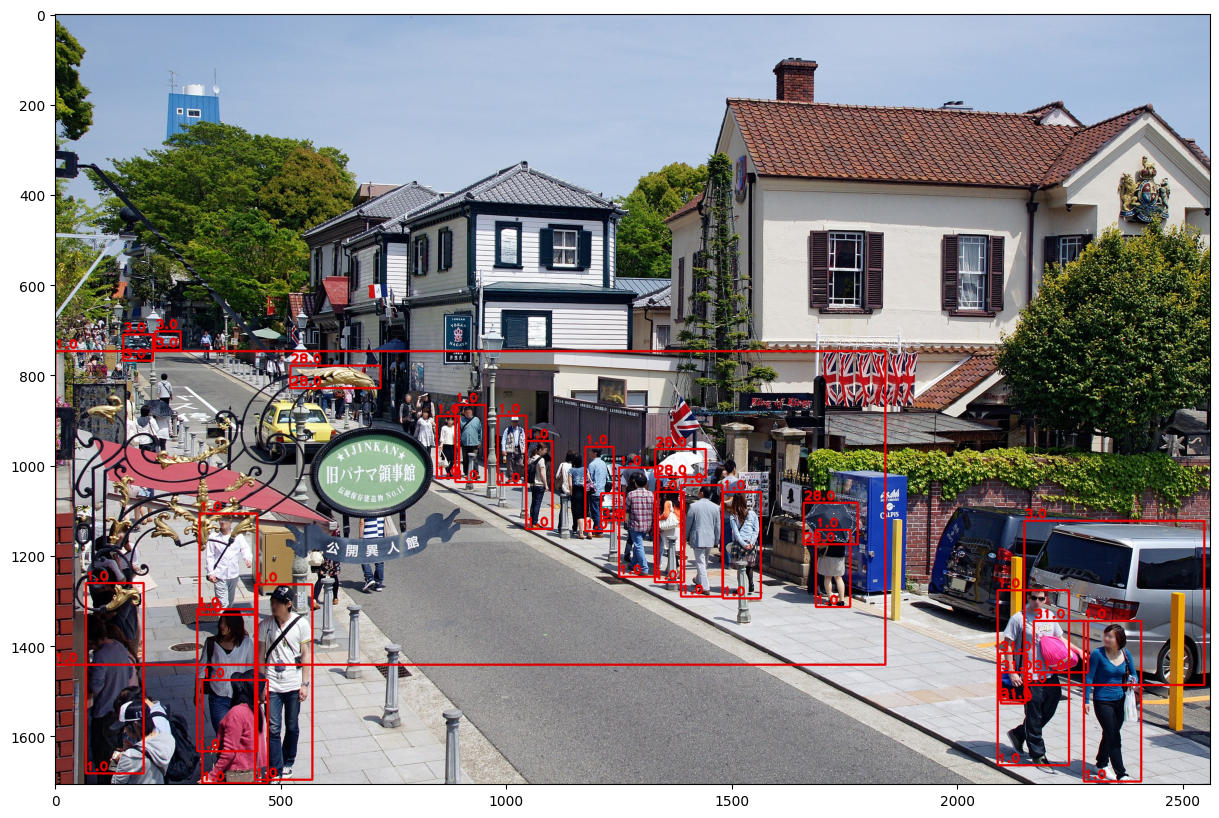

In [8]:
most = [index for index, score in enumerate(result['detection_scores'][0]) if score > 0.6]
bboxes=result['detection_boxes'][0][most]
classes=result['detection_classes'][0][most]


height, width, _ = image.shape

for clas, bbox in zip(classes, bboxes):
    ymin, xmin, ymax, xmax = bbox
    # Convert to pixel coordinates
    xmin = int(xmin * width)
    xmax = int(xmax * width)
    ymin = int(ymin * height)
    ymax = int(ymax * height)
    #image = cv2.rectangle(image, start_point, end_point, color, thickness)
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (225, 0, 0), 3)
    cv2.putText(image,str(clas), (xmin, ymin -5), cv2.FONT_HERSHEY_PLAIN, 2, (225, 0, ), 3)


plt.figure(figsize=(15, 10))
plt.imshow(image)


In [ ]:
""" object_detection instruction
%%bash
sudo apt install -y protobuf 
git clone https://github.com/tensorflow/models.git
protoc models/research/object_detection/protos/*.proto --python_out=.
cp models/research/object_detection/packages/tf2/setup.py .
python -m pip install .


from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops



PATH_TO_LABELS = 'https://github.com/tensorflow/models/blob/master/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


label_id_offset = 0
image_np_with_detections = image_np.copy()

# Use keypoints if available in detections
keypoints, keypoint_scores = None, None
if 'detection_keypoints' in result:
  keypoints = result['detection_keypoints'][0]
  keypoint_scores = result['detection_keypoint_scores'][0]

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections[0],
      result['detection_boxes'][0],
      (result['detection_classes'][0] + label_id_offset).astype(int),
      result['detection_scores'][0],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.30,
      agnostic_mode=False,
      keypoints=keypoints,
      keypoint_scores=keypoint_scores,
      keypoint_edges=COCO17_HUMAN_POSE_KEYPOINTS)

plt.figure(figsize=(24,32))
plt.imshow(image_np_with_detections[0])
plt.show()


"""

# Object Detection using YOLO model (https://github.com/AlexeyAB/darknet)

In [9]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:06<00:00, 8.22MB/s]


In [10]:
result_yolo=model(image)
print(result_yolo)


0: 448x640 16 persons, 1 truck, 1 traffic light, 1 backpack, 1151.4ms
Speed: 13.4ms preprocess, 1151.4ms inference, 89.8ms postprocess per image at shape (1, 3, 448, 640)


[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant'

In [11]:
bboxes = result_yolo[0].boxes.xyxy
bboxes = np.array(result_yolo[0].boxes.xyxy.cpu(), dtype="int")
classes = np.array(result_yolo[0].boxes.cls.cpu(), dtype="int")
print(bboxes, classes)

[[2284 1347 2400 1698]
 [1396 1044 1476 1280]
 [ 461 1267  553 1685]
 [1254 1008 1330 1245]
 [1048  958 1095 1136]
 [ 320 1473  444 1701]
 [ 327 1330  435 1607]
 [ 119 1508  267 1702]
 [ 238 1547  320 1701]
 [ 900  878  948 1031]
 [1177  965 1233 1143]
 [2146 1118 2555 1480]
 [   0  298   51  361]
 [1112  966 1167 1159]
 [2095 1316 2264 1663]
 [ 990  901 1038 1035]
 [1488 1073 1561 1284]
 [1329 1067 1383 1253]
 [2089 1317 2170 1660]] [ 0  0  0  0  0  0  0  0 24  0  0  7  9  0  0  0  0  0  0]


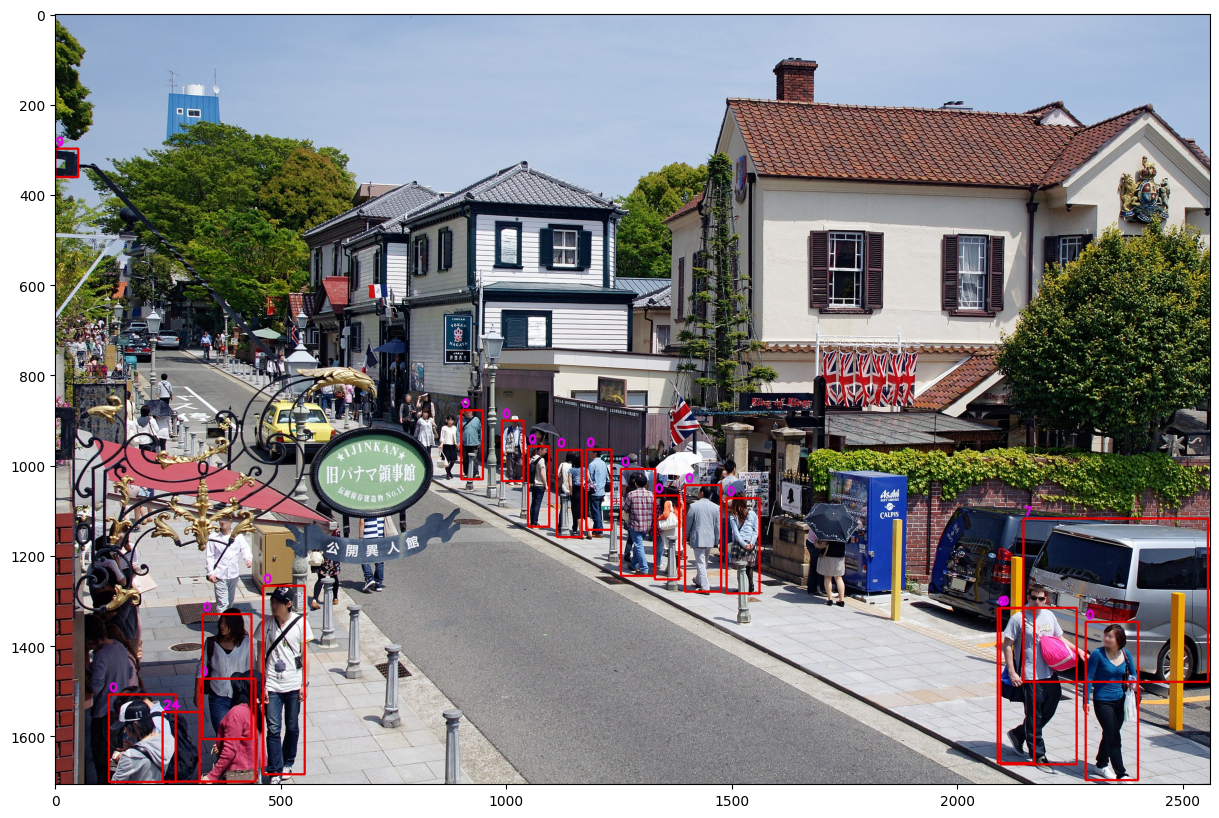

In [16]:
for cls, bbox in zip(classes, bboxes):
    (x, y, x2, y2) = bbox
    cv2.rectangle(image, (x, y), (x2, y2), (225, 0, 0), 3)
    cv2.putText(image,str(cls), (x, y - 5), cv2.FONT_HERSHEY_PLAIN, 2, (225, 0,225 ), 3)

plt.figure(figsize=(15, 10))
plt.imshow(image)